# pytorch workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [3]:
weight = 0.7
bias = 0.3

# creat data
start = 0
end = 1
step = 0.02
X1 = torch.arange(start, end, step)
#增加维度，便于矩阵计算
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias
# 显示信息
X[:10], y[:10], X1, X1.shape, X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 torch.Size([50]),
 torch.Size([50, 1]))

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

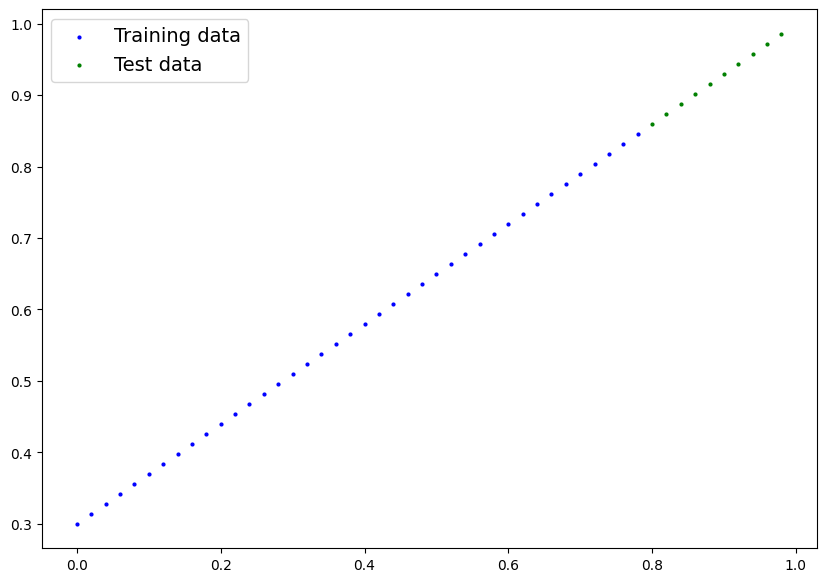

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plot training data
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # show label
  plt.legend(prop={"size": 14})
plot_predictions();

## Build Model


In [6]:
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [7]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

# 列出命名参数
parameters = list(model_0.parameters())
print(parameters)

# 访问状态字典
state_dict = model_0.state_dict()
print(state_dict)

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [8]:
# make prediction
with torch.inference_mode():
      y_preds = model_0(X_test)

# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


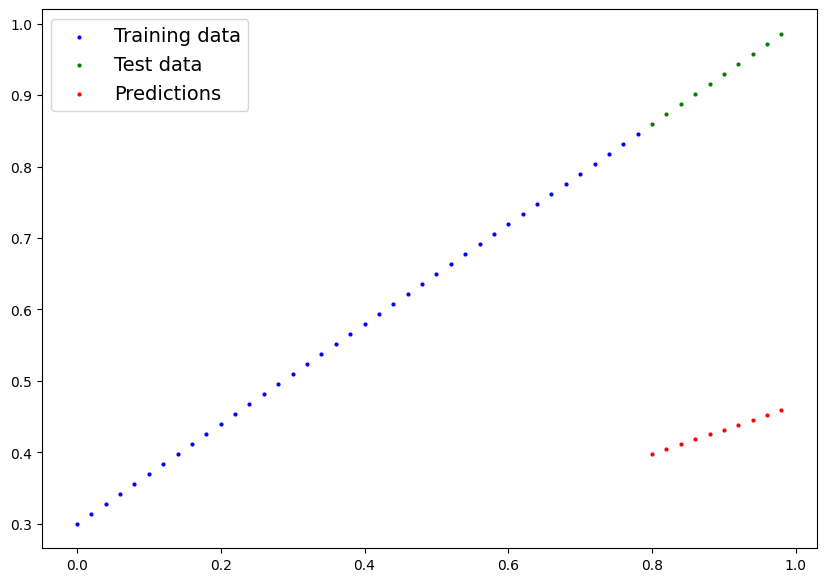

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## train model

In [11]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### creat an optimization loop in pytorch

In [12]:
torch.manual_seed(42)
# hao many times the model will pass
epochs = 100

# creat empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### train
  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch:{epoch}|MAE TRAIN loss:{loss}|MAE Test Loss{test_loss}")

Epoch:0|MAE TRAIN loss:0.31288138031959534|MAE Test Loss0.48106518387794495
Epoch:10|MAE TRAIN loss:0.1976713240146637|MAE Test Loss0.3463551998138428
Epoch:20|MAE TRAIN loss:0.08908725529909134|MAE Test Loss0.21729660034179688
Epoch:30|MAE TRAIN loss:0.053148526698350906|MAE Test Loss0.14464017748832703
Epoch:40|MAE TRAIN loss:0.04543796554207802|MAE Test Loss0.11360953003168106
Epoch:50|MAE TRAIN loss:0.04167863354086876|MAE Test Loss0.09919948130846024
Epoch:60|MAE TRAIN loss:0.03818932920694351|MAE Test Loss0.08886633068323135
Epoch:70|MAE TRAIN loss:0.03476089984178543|MAE Test Loss0.0805937647819519
Epoch:80|MAE TRAIN loss:0.03132382780313492|MAE Test Loss0.07232122868299484
Epoch:90|MAE TRAIN loss:0.02788739837706089|MAE Test Loss0.06473556160926819


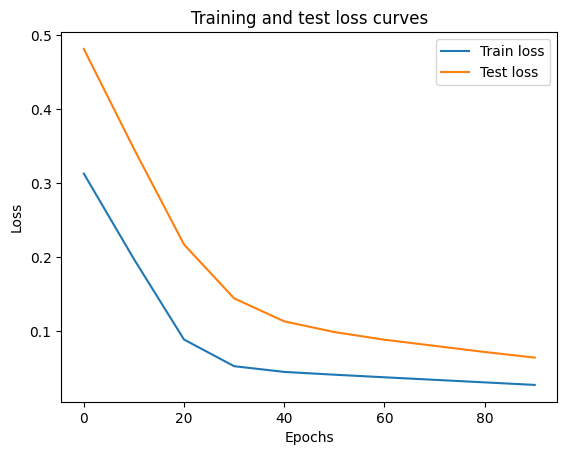

In [13]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [14]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Making predictions with a trained pytorch model

In [15]:
# 1 set the mode in evaluation mode
model_0.eval()

# 2 setup the inference mode context manager
with torch.inference_mode():
   y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

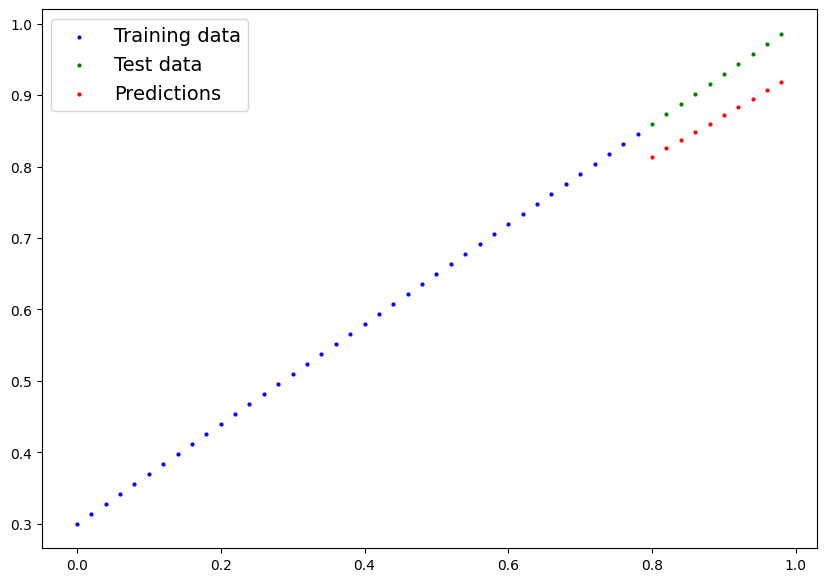

In [16]:
plot_predictions(predictions=y_preds)

## Saving and loading a pytorch model

### saving a pytorch model's state_dict()

In [18]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to :models/01_pytorch_workflow_model_0.pth


In [19]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Dec 28 08:23 models/01_pytorch_workflow_model_0.pth


### loading a saved pytorch model's state_dict()

In [20]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [21]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [22]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])